In [77]:
import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("mps")

In [78]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data/train',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.MNIST(
    root='./data/test',
    train=False,
    download=True,
    transform=transform
)

60000
torch.Size([1, 28, 28]) 5


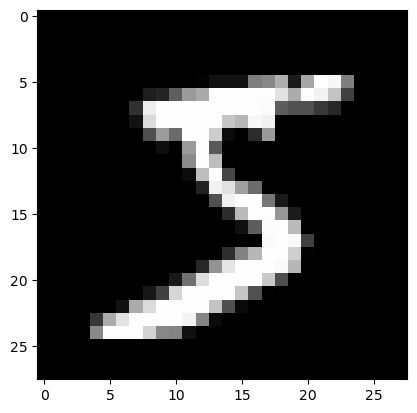

In [79]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [80]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [81]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


In [82]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

In [83]:
from torch import nn


class Model(nn.Module):
    def __init__(self, input_dim, num_dim, num_classes):
        super().__init__()

        self.layer1 = nn.Linear(input_dim, num_dim)
        self.layer2 = nn.Linear(num_dim, num_dim)
        self.layer3 = nn.Linear(num_dim, num_classes)  

        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)  
        x = self.act(self.layer1(x))       
        x = self.act(self.layer2(x))       
        x = self.layer3(x)                 
        return x


model = Model(28 * 28 * 1, 1024, 10)

In [84]:
from torch.optim import SGD

lr = 0.001
model = model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = SGD(model.parameters(), lr=lr)

In [85]:

num_epochs = 100
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
  start_time = time.time()  # 에포크 시작 시간 기록
  total_loss = 0.
  model.train()  # 학습 모드

  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model(inputs)
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  with torch.no_grad():
    model.eval()  # 평가 모드
    train_acc = accuracy(model, trainloader)  # 학습 데이터 정확도
    test_acc = accuracy(model, testloader)    # 테스트 데이터 정확도

  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)

  print(f"Epoch {epoch+1:3d} |"
        f" Train Acc: {train_acc:.3f} |"
        f" Test Acc: {test_acc:.3f}")

Epoch   1 | Train Acc: 0.225 | Test Acc: 0.226
Epoch   2 | Train Acc: 0.347 | Test Acc: 0.351
Epoch   3 | Train Acc: 0.433 | Test Acc: 0.441
Epoch   4 | Train Acc: 0.512 | Test Acc: 0.521
Epoch   5 | Train Acc: 0.569 | Test Acc: 0.577
Epoch   6 | Train Acc: 0.604 | Test Acc: 0.610
Epoch   7 | Train Acc: 0.628 | Test Acc: 0.634
Epoch   8 | Train Acc: 0.644 | Test Acc: 0.653
Epoch   9 | Train Acc: 0.657 | Test Acc: 0.666
Epoch  10 | Train Acc: 0.669 | Test Acc: 0.676
Epoch  11 | Train Acc: 0.679 | Test Acc: 0.688
Epoch  12 | Train Acc: 0.688 | Test Acc: 0.696
Epoch  13 | Train Acc: 0.696 | Test Acc: 0.705
Epoch  14 | Train Acc: 0.704 | Test Acc: 0.712
Epoch  15 | Train Acc: 0.711 | Test Acc: 0.718
Epoch  16 | Train Acc: 0.717 | Test Acc: 0.722
Epoch  17 | Train Acc: 0.723 | Test Acc: 0.730
Epoch  18 | Train Acc: 0.728 | Test Acc: 0.738
Epoch  19 | Train Acc: 0.735 | Test Acc: 0.744
Epoch  20 | Train Acc: 0.744 | Test Acc: 0.753
Epoch  21 | Train Acc: 0.754 | Test Acc: 0.765
Epoch  22 | T

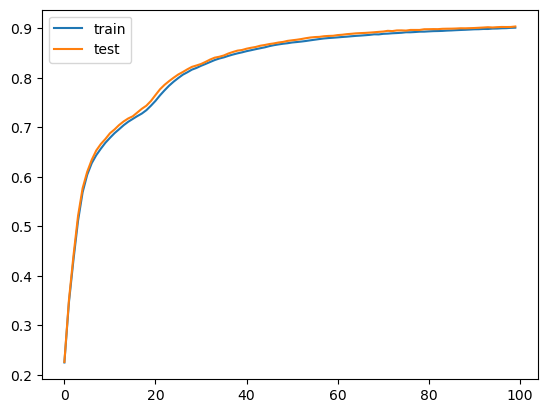

In [86]:
import numpy as np

def plot_acc(train_accuracies, test_accuracies, label1='train', label2='test'):
  x = np.arange(len(train_accuracies))

  plt.plot(x, train_accuracies, label=label1)
  plt.plot(x, test_accuracies, label=label2)
  plt.legend()
  plt.show()

plot_acc(train_accuracies, test_accuracies)